## Status of MFU Student

## Data Cleaning & Feature Engineering

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
df = pd.read_csv('tcas1.csv')

C:\Users\Asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (23,24,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.shape

(36401, 79)

In [4]:
df.head()

,AcademicYear,AcademicSemester,PrefixName,Sex,FacultyID,FacultyName,DepartmentCode,DepartmentName,MajorName,EntryTypeID,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Status
0,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
1,2562,1,MR.,Male,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
2,2562,1,MR.,Male,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
3,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
4,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student


In [5]:
df = df.drop(columns=['ProvinceNameEng','GPA_Eng','GPA_Math','GPA_Sci','GPA_Sco','DepartmentName','MajorName',
                      'EntryGPA','Country','EntryGroupID','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14',
                      'Q15','Q16','Q17','Q18','Q19','Q20','Q21','Q22','Q23','Q24','Q25','Q26','Q27','Q28','Q29','Q30','Q31','Q32','Q33','Q34','Q35','Q36','Q37','Q38','Q39','Q40','Q41','Q42','AcademicSemester',
                      'PrefixName','LevelNameEng','LevelName','SchoolRegionName','SchoolRegion','SchoolProvince','NationName','EntryGroupName','SchoolRegionNameEng','SchoolName','ApplicationDate','StudentType','ReligionName'], axis=1)

df.head()

,AcademicYear,Sex,FacultyID,FacultyName,DepartmentCode,EntryTypeID,EntryTypeName,TCAS,LevelID,HomeRegion,StudentTH,GPAX,Status
0,2562,Female,10,School of Liberal Arts,1005,40,FOREIGNER,5,3,International,0,0.0,MFU student
1,2562,Male,10,School of Liberal Arts,1005,40,FOREIGNER,5,3,International,0,0.0,MFU student
2,2562,Male,10,School of Liberal Arts,1005,40,FOREIGNER,5,3,International,0,0.0,MFU student
3,2562,Female,10,School of Liberal Arts,1005,40,FOREIGNER,5,3,International,0,0.0,MFU student
4,2562,Female,10,School of Liberal Arts,1005,40,FOREIGNER,5,3,International,0,0.0,MFU student


In [6]:
df.dtypes

AcademicYear        int64
Sex                object
FacultyID           int64
FacultyName        object
DepartmentCode      int64
EntryTypeID         int64
EntryTypeName      object
TCAS                int64
LevelID             int64
HomeRegion         object
StudentTH           int64
GPAX              float64
Status             object
dtype: object

In [7]:
df[['GPAX']]= df.GPAX.fillna(df.GPAX.mean())

In [8]:
df[['HomeRegion']]= df.HomeRegion.fillna(df.HomeRegion.mode()[0]) 


In [9]:
df.head()

,AcademicYear,Sex,FacultyID,FacultyName,DepartmentCode,EntryTypeID,EntryTypeName,TCAS,LevelID,HomeRegion,StudentTH,GPAX,Status
0,2562,Female,10,School of Liberal Arts,1005,40,FOREIGNER,5,3,International,0,0.0,MFU student
1,2562,Male,10,School of Liberal Arts,1005,40,FOREIGNER,5,3,International,0,0.0,MFU student
2,2562,Male,10,School of Liberal Arts,1005,40,FOREIGNER,5,3,International,0,0.0,MFU student
3,2562,Female,10,School of Liberal Arts,1005,40,FOREIGNER,5,3,International,0,0.0,MFU student
4,2562,Female,10,School of Liberal Arts,1005,40,FOREIGNER,5,3,International,0,0.0,MFU student


In [10]:
df.isnull().sum()

AcademicYear      0
Sex               0
FacultyID         0
FacultyName       0
DepartmentCode    0
EntryTypeID       0
EntryTypeName     0
TCAS              0
LevelID           0
HomeRegion        0
StudentTH         0
GPAX              0
Status            0
dtype: int64

In [11]:
df.isnull().sum(axis=1).sum()


0

In [12]:
df.isnull().mean()
threshold = 0.5
new_df = df[df.columns[df.isnull().mean() < threshold]]
new_df.isnull().mean()

AcademicYear      0.0
Sex               0.0
FacultyID         0.0
FacultyName       0.0
DepartmentCode    0.0
EntryTypeID       0.0
EntryTypeName     0.0
TCAS              0.0
LevelID           0.0
HomeRegion        0.0
StudentTH         0.0
GPAX              0.0
Status            0.0
dtype: float64

In [13]:
print(df.median())
new_df = df.fillna(df.median())
print(new_df.isnull().sum())

AcademicYear      2563.00
FacultyID           16.00
DepartmentCode    1601.00
EntryTypeID         20.00
TCAS                 3.00
LevelID              3.00
StudentTH            1.00
GPAX                 2.43
dtype: float64
AcademicYear      0
Sex               0
FacultyID         0
FacultyName       0
DepartmentCode    0
EntryTypeID       0
EntryTypeName     0
TCAS              0
LevelID           0
HomeRegion        0
StudentTH         0
GPAX              0
Status            0
dtype: int64


In [14]:
new_df.isnull().sum(axis=1).sum()

0

In [15]:
df = pd.concat([new_df] ,axis=1)

In [16]:
df.dtypes

AcademicYear        int64
Sex                object
FacultyID           int64
FacultyName        object
DepartmentCode      int64
EntryTypeID         int64
EntryTypeName      object
TCAS                int64
LevelID             int64
HomeRegion         object
StudentTH           int64
GPAX              float64
Status             object
dtype: object

In [17]:
num_data = df.select_dtypes(include=['number']) 
# get all nominal / ordinal / Boolean features
cat_data = df[['FacultyName','HomeRegion','EntryTypeName','Sex']]
# get class
class_target = df.Status

In [18]:
num_data.head()

,AcademicYear,FacultyID,DepartmentCode,EntryTypeID,TCAS,LevelID,StudentTH,GPAX
0,2562,10,1005,40,5,3,0,0.0
1,2562,10,1005,40,5,3,0,0.0
2,2562,10,1005,40,5,3,0,0.0
3,2562,10,1005,40,5,3,0,0.0
4,2562,10,1005,40,5,3,0,0.0


In [19]:
cat_data.head()

,FacultyName,HomeRegion,EntryTypeName,Sex
0,School of Liberal Arts,International,FOREIGNER,Female
1,School of Liberal Arts,International,FOREIGNER,Male
2,School of Liberal Arts,International,FOREIGNER,Male
3,School of Liberal Arts,International,FOREIGNER,Female
4,School of Liberal Arts,International,FOREIGNER,Female


In [20]:
class_target.head()

0    MFU student
1    MFU student
2    MFU student
3    MFU student
4    MFU student
Name: Status, dtype: object

In [21]:
Sex={'Female':1,'Male':2}

Sex=cat_data.Sex.apply(Sex.get)
Sex

0        1
1        2
2        2
3        1
4        1
        ..
36396    1
36397    1
36398    1
36399    1
36400    1
Name: Sex, Length: 36401, dtype: int64

In [22]:
EntryTypeName={'FOREIGNER':1,'QUOTA 17 NORTHERN PROVINCES':2,'DIRECT ADMISSION BY SCHOOL':3,'INTERNATIONAL SCHOOL':4,'ADMISSIONS':5,
               'QUOTA BY SCHOOL':6,'SPECIAL FOR GOOD STUDENT':7,'GOOD BEHAVE STUDENTS':8,'CHIANG RAI DEVELOPMENT SCHOLARSHIP':9,'DIRECT ADMISSION':10,
               'RE-ID FIRST SEMESTER GPAX 2.00':11}

EntryTypeName=cat_data.EntryTypeName.apply(EntryTypeName.get)
EntryTypeName

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
36396    3.0
36397    3.0
36398    3.0
36399    3.0
36400    3.0
Name: EntryTypeName, Length: 36401, dtype: float64

In [23]:
HomeRegion={'International':1,'North':2,'Central':3,'South':4,
             'East':5,'West':6,'Bankok':7,'North East':8}

HomeRegion=cat_data.HomeRegion.apply(HomeRegion.get)
HomeRegion

0        1
1        1
2        1
3        1
4        1
        ..
36396    4
36397    2
36398    5
36399    2
36400    8
Name: HomeRegion, Length: 36401, dtype: int64

In [24]:
FacultyName={'School of Agro-industry':1,'School of Cosmetic Science':2,'School of Dentistry':3,'School of Health Science':4,
             'School of Information Technology':5,'School of Integrative Medicine':6,
             'School of Law':7,
             'School of Liberal Arts':8,'School of Management':9,'School of Medicine':10,'School of Nursing':11,'School of Science':12,'School of Sinology':13,'School of Social Innovation':14}

FacultyName=cat_data.FacultyName.apply(FacultyName.get)
FacultyName

0        8
1        8
2        8
3        8
4        8
        ..
36396    9
36397    1
36398    9
36399    9
36400    1
Name: FacultyName, Length: 36401, dtype: int64

In [25]:
transform_num_data = pd.concat([num_data,FacultyName],axis=1)


In [26]:
X = transform_num_data
Y = class_target

## K-Nearest Neighbors (KNN) Models

Train and Test on the Entire Dataset:

In [27]:
# Rescaling features into a range of [0,1]
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X)
X = mms.fit_transform(X)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Initialize the knn model with k = 2
knn = KNeighborsClassifier(n_neighbors=2, metric = 'euclidean')

# Fit the model to the whole dataset
knn.fit(X, Y)

# Predict classes of training set
y_pred = knn.predict(X)

# Evaluate model performace
ac = metrics.accuracy_score(Y, y_pred)
print('Training Accuracy: ', ac)

Training Accuracy:  0.6964918546193786


In [29]:
# Import module from sklean to split data onto training and test sets
from sklearn.model_selection import train_test_split
# Split training set and test set with ration 70% : 30% by specify test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, stratify = Y, random_state = 0)

# print the shape of trainning and test sets
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (25480, 9)
y_train shape:  (25480,)
x_test shape:  (10921, 9)
y_test shape:  (10921,)


In [30]:
Y.value_counts()

Not MFU student    27752
MFU student         8649
Name: Status, dtype: int64

In [31]:
y_train.value_counts()

Not MFU student    19426
MFU student         6054
Name: Status, dtype: int64

In [32]:
y_test.value_counts()

Not MFU student    8326
MFU student        2595
Name: Status, dtype: int64

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Initialize the knn model with k = 2
knn = KNeighborsClassifier(n_neighbors=2, metric = 'euclidean')

# Fit the model to the training set
knn.fit(x_train, y_train)

# Predict classes of the test set
y_pred = knn.predict(x_test)

# Evaluate model performace
ac = metrics.accuracy_score(y_test, y_pred)
print('Tesing Accuracy: ', ac)

Tesing Accuracy:  0.6456368464426334


In [34]:
#Step 1: Import the sklearn classes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

#Step 2: Create the model object with paramenters
#Create an instance of KNeighborsClassifier with k=2 
knn = KNeighborsClassifier(n_neighbors=2, metric = 'euclidean') 

#Step 3: Fit and test the model with cross validation (5-fold)
cv_results = cross_validate(knn, X,Y, cv=10, return_train_score=True)

# Accuracy score for each fold 
#print('Tesing Accuracy for each fold:', cv_results['test_score'])

# Overall accuracy score for cross validaiton 
print('Cross Validation Accuracy: %.3f +/- %.3f' % (cv_results['test_score'].mean(), cv_results['test_score'].std()))

Cross Validation Accuracy: 0.386 +/- 0.217


In [35]:
# Experimenting with different k values
from sklearn import metrics
k_range = list(range(1,15))
scores_cv = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv_results = cross_validate(knn, X,Y, cv=10) # compute CV accuracy
    scores_cv.append(cv_results['test_score'].mean())
    print(k, cv_results['test_score'].mean())

1 0.3952370967401179
2 0.38575897667287395
3 0.41001654689721156
4 0.3983955168698371
5 0.4116092895020388
6 0.4054831724167072
7 0.41847692337873604
8 0.4104274728292855
9 0.41982254150683157
10 0.41460289710289705
11 0.42152559675973567
12 0.414547725688209
13 0.42833857230382916
14 0.425618822265348


## (Best) k value for the KNN model of this dataset

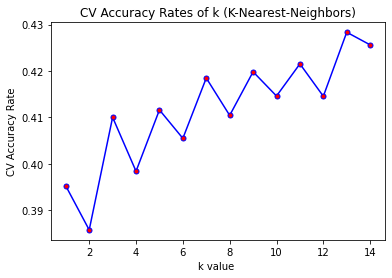

In [36]:
# create a line graph for testing accuracy
import matplotlib.pyplot as plt
plt.plot(k_range, scores_cv, 'y', color='blue',marker='o', markerfacecolor='red', markersize='5')
plt.xlabel('k value ')
plt.ylabel('CV Accuracy Rate')
plt.title('CV Accuracy Rates of k (K-Nearest-Neighbors)')
plt.show()

In [37]:
# find best k with the highest cv accuracy
import operator
index, value = max(enumerate(scores_cv), key=operator.itemgetter(1))
print('best k = ', index+1, 'accuracy = ', value)

best k =  13 accuracy =  0.42833857230382916


In [38]:
#Step 1: Import the sklearn class
from sklearn.neighbors import KNeighborsClassifier

#Step 2: Create the model object with paramenters
#Create an instance of KNeighborsClassifier with k=6 (best k) 
best_knn = KNeighborsClassifier(n_neighbors=6, metric = 'euclidean') 

#Step 3: Fit the model with data (model training)
#Model is learning the relationship between data (X) and class(Y)
best_knn.fit(X,Y)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [39]:
import pickle
pickle.dump(best_knn, open('best_knn.pkl','wb'))
pickle.dump(mms, open('normalization.pkl','wb'))

In [40]:
df.to_csv('AI.csv')